In [71]:
import urllib3
import json
import os
from dotenv import load_dotenv
from google.oauth2 import service_account
from apiclient import discovery

import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt

In [72]:
load_dotenv()

True

In [77]:
def get_data_lambda():
    
    print (os.environ.get("API_KEY"))
    http = urllib3.PoolManager()    # Create PoolManager object
    #url = "https://cloud.iexapis.com/stable/stock/tsla/previous?token=" + os.environ.get("API_KEY") # Define URL, with token coming from environment variable
    url = "https://sandbox.iexapis.com/stable/stock/TSLA/chart/1m?token=Tpk_181f3c56f73441798055291edda9cc09"
    resp = http.request("GET", url)     # Make GET request and save the response
    #print(resp.status)                  # The response object has several attributes.
    values = json.loads(resp.data)      # One attribute is the actual data. Load as JSON and save to "valeus"
    #print(values)
    return values

In [78]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']
SAMPLE_SPREADSHEET_ID = '1YBDYsqbOqbs94K1inMrL6ppFcjH-qbtYPE_mCXxCXzA'      # Get this from the url // Refer to google API documentation
SAMPLE_RANGE_NAME = 'A1:AA1000'

In [79]:
def Export_Data_To_Sheets():

    credentials = service_account.Credentials.from_service_account_file(    # These lines will always be the same.
        "service_account.json", scopes=SCOPES)                              # These lines will always be the same.
    service = discovery.build('sheets', 'v4', credentials=credentials)      # These lines will always be the same. 

    values = get_data_lambda()
    all_dates = []
    all_close = []
    for val in values: 
        date = val['date']
        close = val['close']
        all_dates.append(date)
        all_close.append(close)
    
    final_data = {'values':[all_dates,all_close]}               # When exporting, need to pass in a dictionary, where the key is "values"
                                                                # The value of the key "values" is a list of lists
                                                                # Each nested list then occupies a row


    service.spreadsheets().values().append(                                 # These lines will always be the same.
        spreadsheetId=SAMPLE_SPREADSHEET_ID ,
        valueInputOption='RAW',
        range=SAMPLE_RANGE_NAME,
        body=final_data).execute()


    print('Sheet successfully Updated')

In [80]:
Export_Data_To_Sheets()

2022-07-18 17:34:33.841 file_cache is only supported with oauth2client<4.0.0


pk_3eb01a77e8a247f8bf01a6a297e0cb1e
Sheet successfully Updated


In [12]:
"""
def Export_Data_To_Sheets():

    credentials = service_account.Credentials.from_service_account_file(    # These lines will always be the same.
        "service_account.json", scopes=SCOPES)                              # These lines will always be the same.
    service = discovery.build('sheets', 'v4', credentials=credentials)      # These lines will always be the same. 

    values = get_data_lambda()
    values_list = list(values.values())
    final_list = []
    final_list.append(values_list)
    dict_me = dict(values=final_list)

    service.spreadsheets().values().append(                                 # These lines will always be the same.
        spreadsheetId=SAMPLE_SPREADSHEET_ID ,
        valueInputOption='RAW',
        range=SAMPLE_RANGE_NAME,
        body=dict_me).execute()

    print('Sheet successfully Updated')

"""

In [56]:
def Read_Data_From_Sheets():

    credentials = service_account.Credentials.from_service_account_file( 
            "service_account.json", scopes=SCOPES)                            
    service = discovery.build('sheets', 'v4', credentials=credentials)

    result = service.spreadsheets().values().get(
                spreadsheetId=SAMPLE_SPREADSHEET_ID, range=SAMPLE_RANGE_NAME).execute()

    return result

In [81]:
result = Read_Data_From_Sheets()
result

2022-07-18 17:34:36.860 file_cache is only supported with oauth2client<4.0.0


{'range': 'Sheet1!A1:AA1000',
 'majorDimension': 'ROWS',
 'values': [['2022-06-21',
   '2022-06-22',
   '2022-06-23',
   '2022-06-24',
   '2022-06-27',
   '2022-06-28',
   '2022-06-29',
   '2022-06-30',
   '2022-07-01',
   '2022-07-05',
   '2022-07-06',
   '2022-07-07',
   '2022-07-08',
   '2022-07-11',
   '2022-07-12',
   '2022-07-13',
   '2022-07-14',
   '2022-07-15'],
  ['725.24',
   '726.76',
   '717.27',
   '754.5',
   '745.72',
   '722.73',
   '703.48',
   '702.69',
   '701.4',
   '728.7',
   '700.1',
   '761.25',
   '772.93',
   '734.64',
   '720.68',
   '732.14',
   '746.85',
   '749.3']]}

In [89]:
result = Read_Data_From_Sheets()['values']
dates = result[0]
closing_prices = result[1]
df = pd.DataFrame({'date': dates, 'closing_price':closing_prices})
df['closing_price'] = df['closing_price'].astype(float)
df


2022-07-18 17:37:44.195 file_cache is only supported with oauth2client<4.0.0


,date,closing_price
0,2022-06-21,725.24
1,2022-06-22,726.76
2,2022-06-23,717.27
3,2022-06-24,754.50
4,2022-06-27,745.72
5,2022-06-28,722.73
6,2022-06-29,703.48
7,2022-06-30,702.69
8,2022-07-01,701.40
9,2022-07-05,728.70


2022-07-18 17:38:03.503 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-07-18 17:38:03.505 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


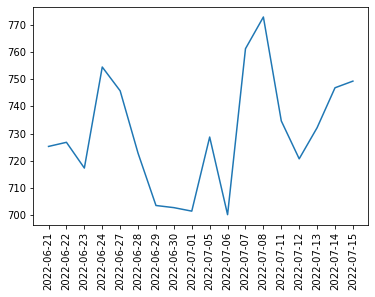

In [91]:
fig, ax = plt.subplots()
ax.plot(df['date'], df['closing_price'])
ax.set_xticks(ticks = list(range(len(df['date']))))
ax.set_xticklabels(labels = df['date'], rotation = 90)
plt.show()

In [93]:
st.pyplot(fig)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)